# Component Analysis - PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
pip install scikit-learn

In [7]:
from sklearn.datasets import load_diabetes

In [8]:
diabetes = load_diabetes()

In [13]:
diabetes.target[:3]

array([151.,  75., 141.])

In [15]:
print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [16]:
diabetes.data.shape

(442, 10)

# Normalização StandardScaler

Padronizar dados significa ajustá-los para ter média zero e desvio padrão um. Essa técnica é útil quando os dados são aproximadamente normais.


[[ 0.80050009  1.06548848  1.29708846 ... -0.05449919  0.41853093
  -0.37098854]
 [-0.03956713 -0.93853666 -1.08218016 ... -0.83030083 -1.43658851
  -1.93847913]
 [ 1.79330681  1.06548848  0.93453324 ... -0.05449919  0.06015558
  -0.54515416]
 ...
 [ 0.87686984  1.06548848 -0.33441002 ... -0.23293356 -0.98564884
   0.32567395]
 [-0.9560041  -0.93853666  0.82123474 ...  0.55838411  0.93616291
  -0.54515416]
 [-0.9560041  -0.93853666 -1.53537419 ... -0.83030083 -0.08875225
   0.06442552]]


Text(0, 0.5, 'segundo componente principal')

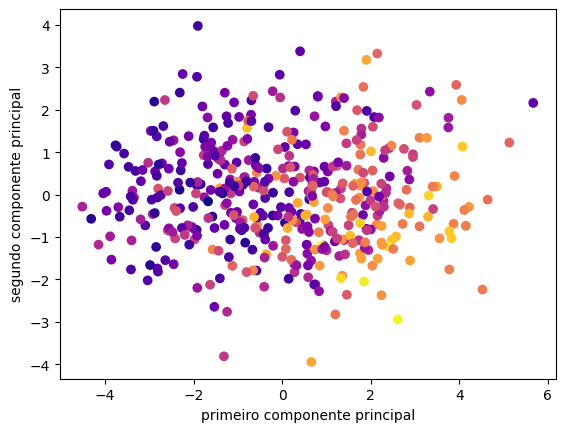

In [18]:
Dados = pd.DataFrame(diabetes['data'],columns = diabetes["feature_names"])

scalar = StandardScaler()
scalar.fit(Dados)

normalizado = scalar.transform(Dados)
print(normalizado)

pca = PCA(n_components = 2)
pca.fit(normalizado)

x_dados = pca.transform(normalizado)
x_dados.shape

plt.scatter(x_dados[:,0], x_dados[:,1], c= diabetes["target"], cmap= "plasma")
plt.xlabel("primeiro componente principal")
plt.ylabel("segundo componente principal")

In [19]:
#Dados.columns
Dados.shape

(442, 10)

In [20]:
pca.components_

array([[ 0.2164309 ,  0.18696688,  0.30316216,  0.27173773,  0.34325511,
         0.35186068, -0.28243681,  0.4288337 ,  0.37861802,  0.32218296],
       [ 0.04436721, -0.3865472 , -0.15628128, -0.138266  ,  0.57302691,
         0.45594185,  0.50623907, -0.06818072, -0.026187  , -0.08494884]])

<Axes: >

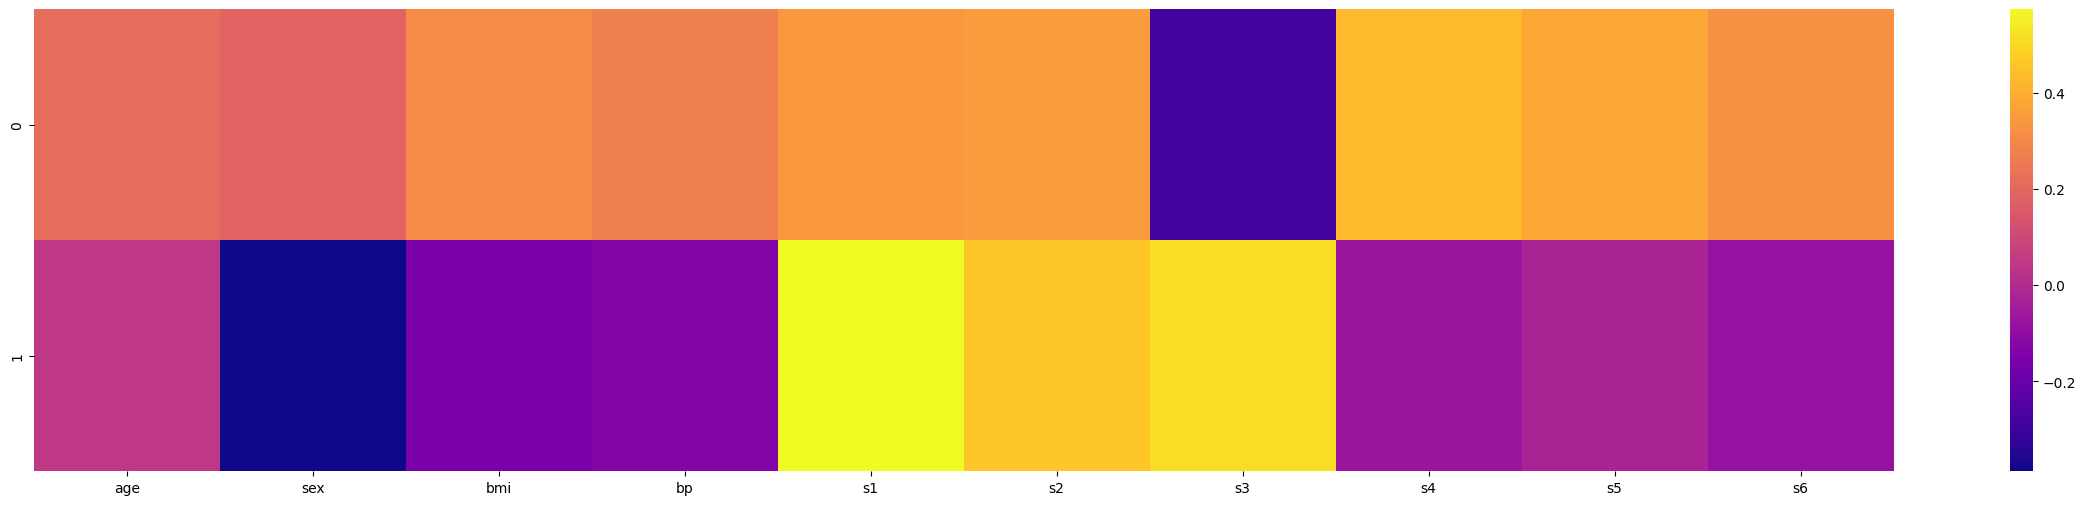

In [21]:
dados_comp = pd.DataFrame(pca.components_,columns=diabetes["feature_names"])

plt.figure(figsize = (30,6))
sns.heatmap(dados_comp, cmap="plasma")

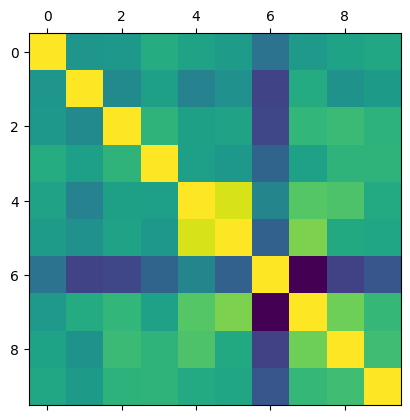

In [22]:
plt.matshow(Dados.corr())

# Extras

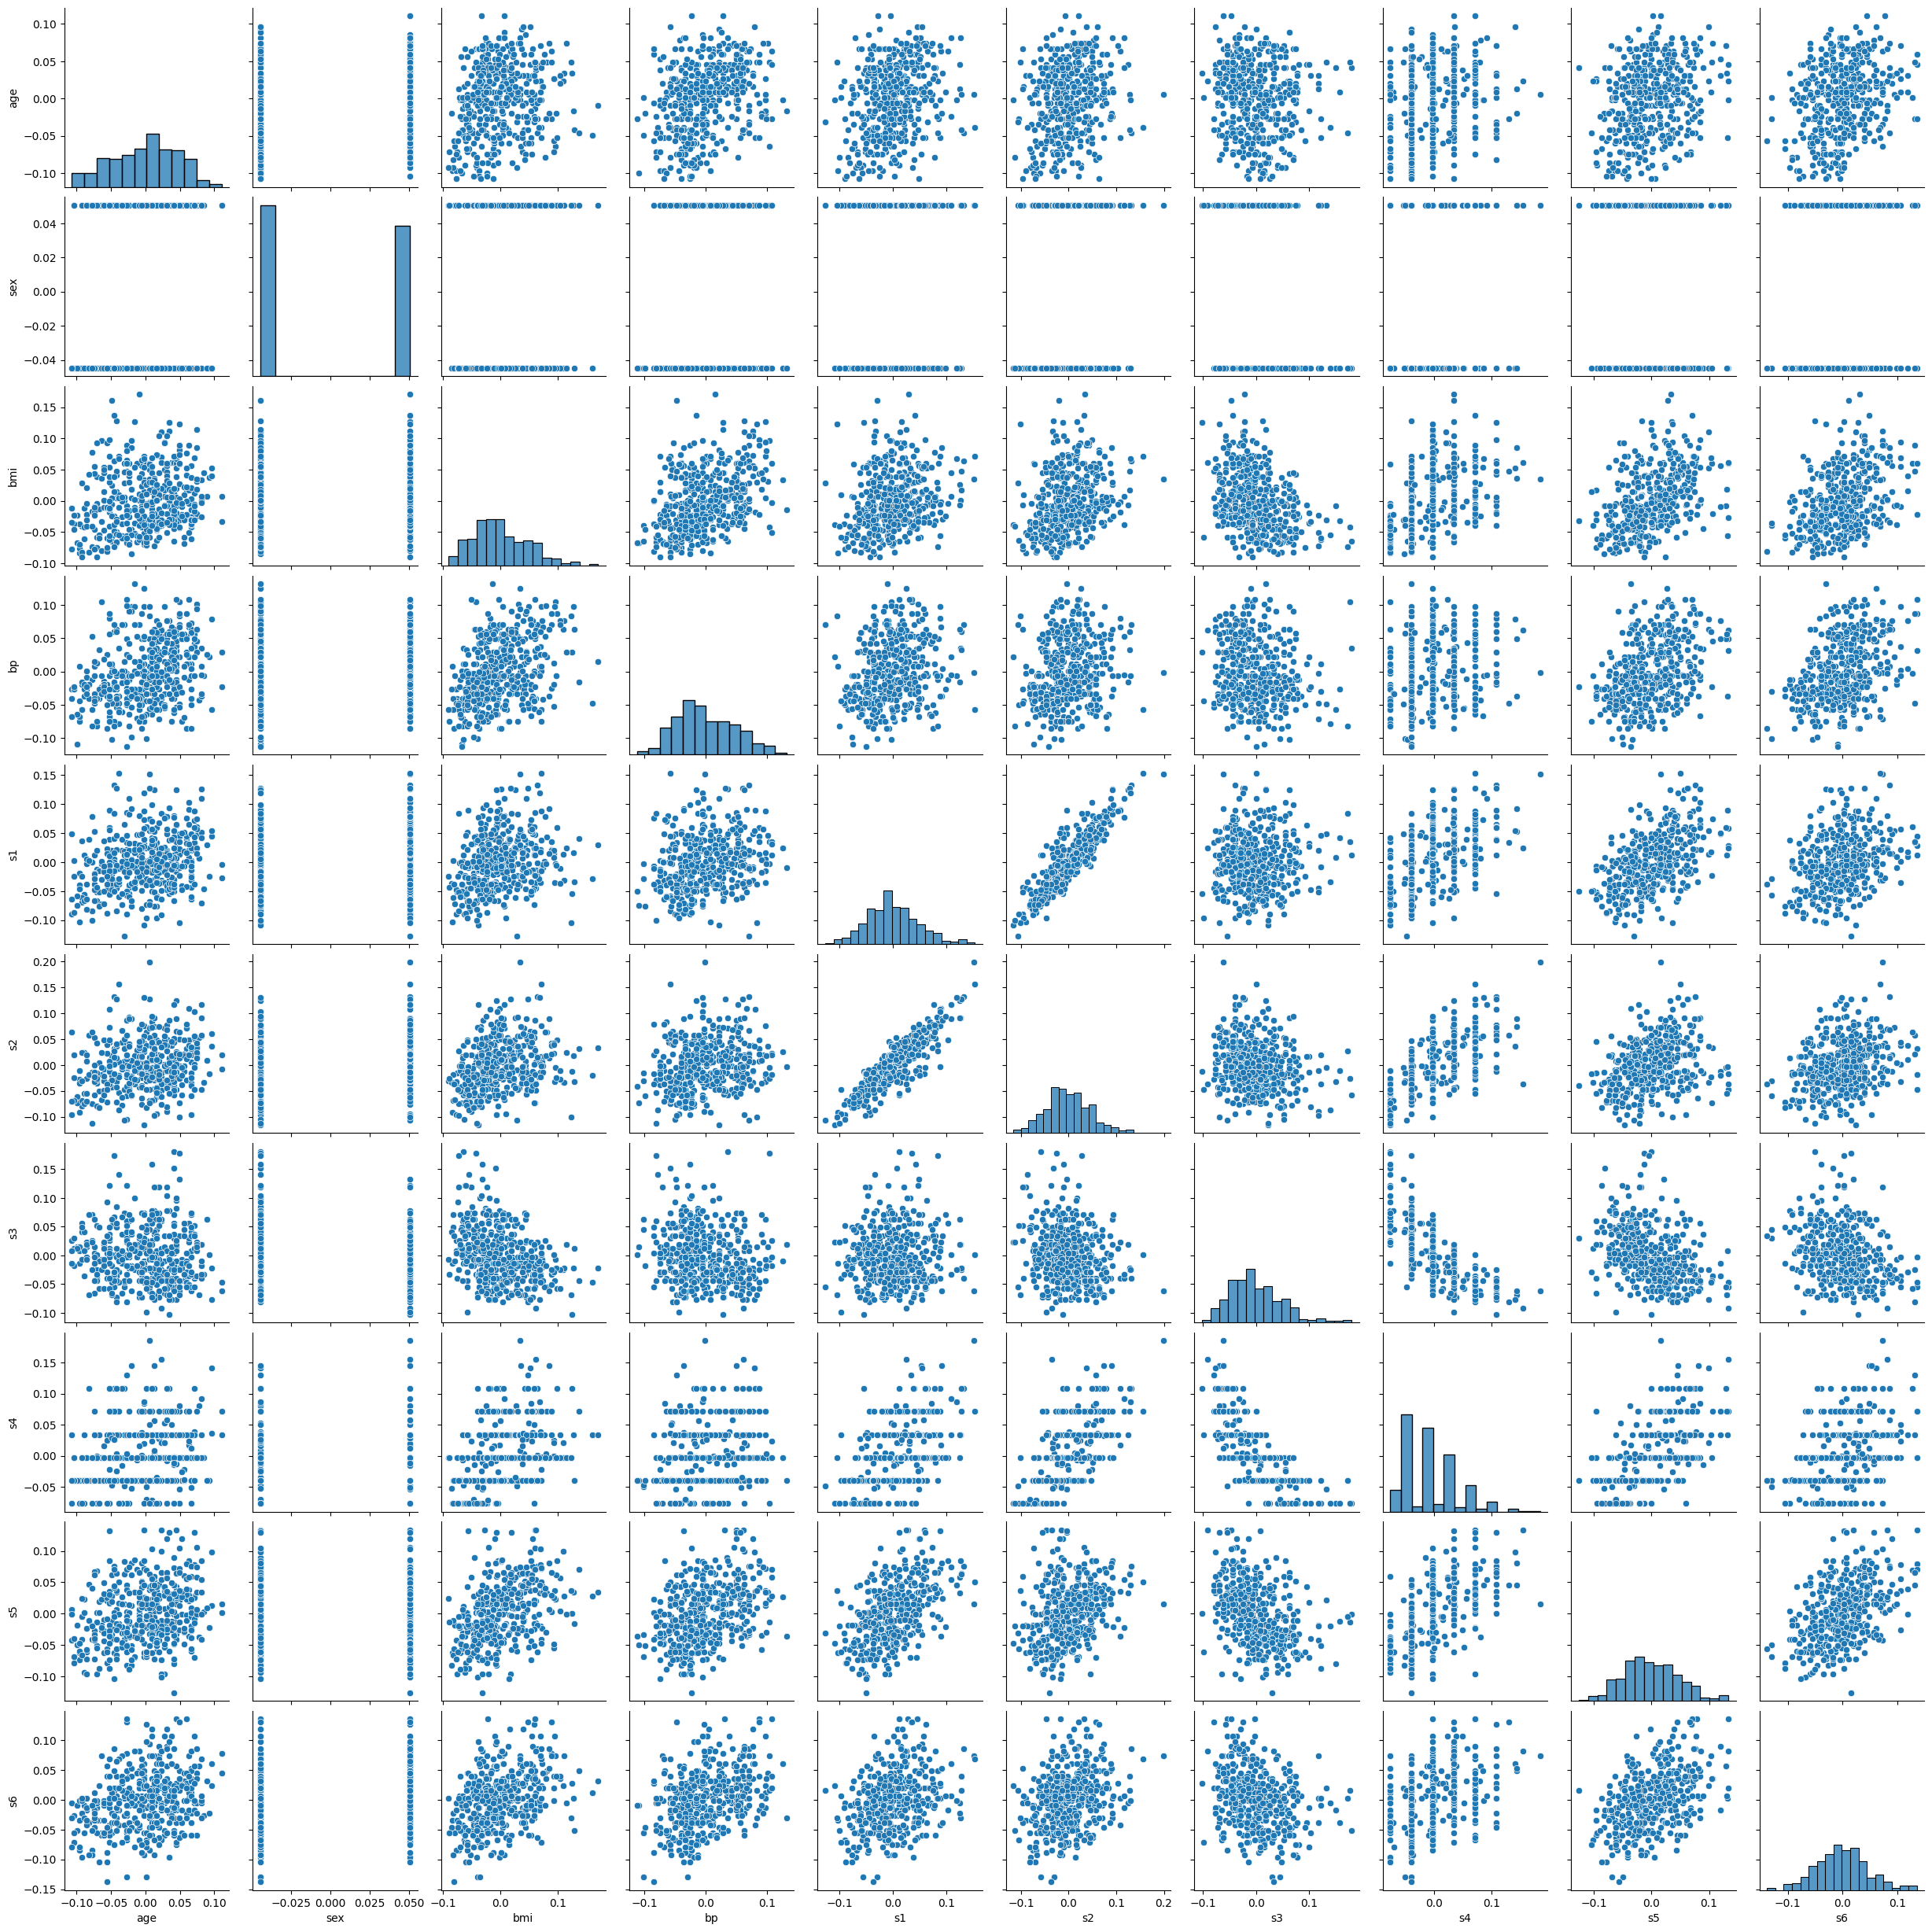

In [23]:
sns.pairplot(Dados)

# Verificando a distribuição

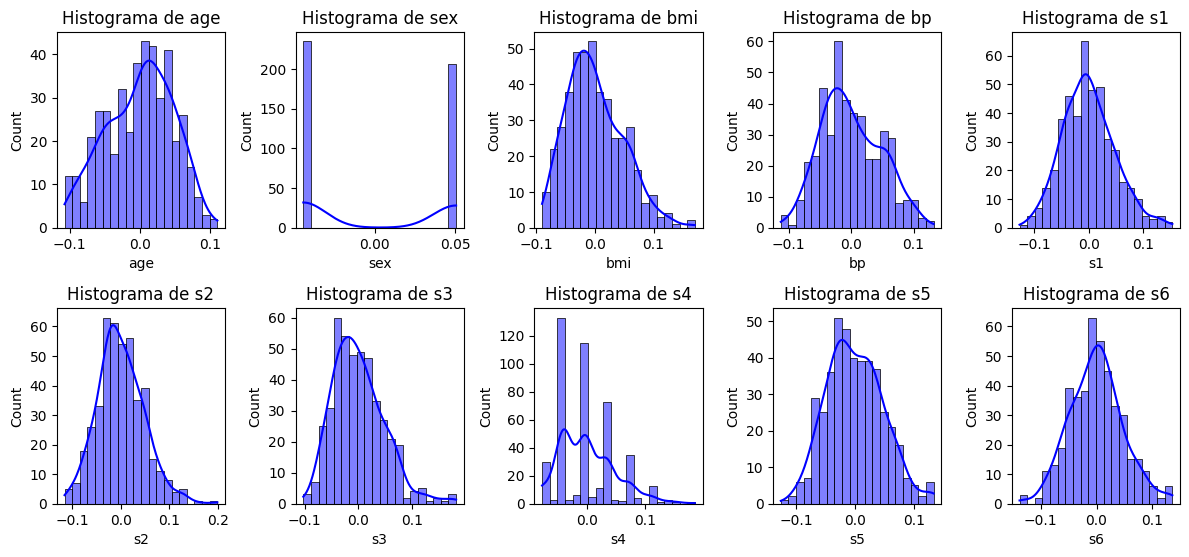

In [24]:
plt.figure(figsize=(12, 8))
for coluna in Dados.columns:
    plt.subplot(3, 5, Dados.columns.get_loc(coluna) + 1)
    sns.histplot(Dados[coluna], bins=20, kde=True, color='blue')
    plt.title(f'Histograma de {coluna}')

plt.tight_layout()
plt.show()

# Verificando a presença de outliers

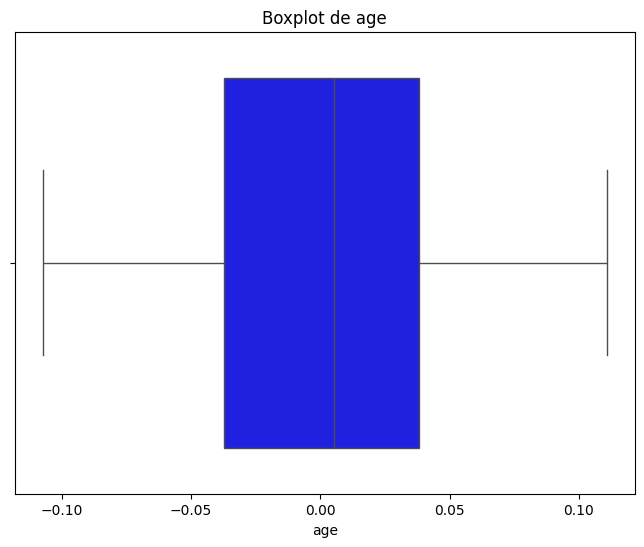

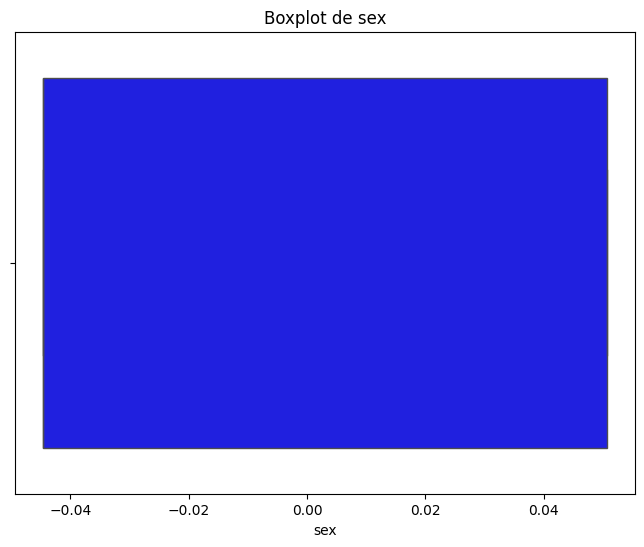

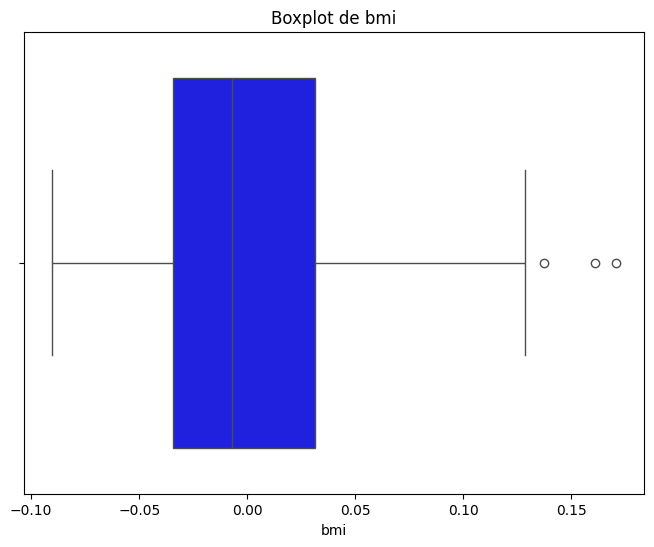

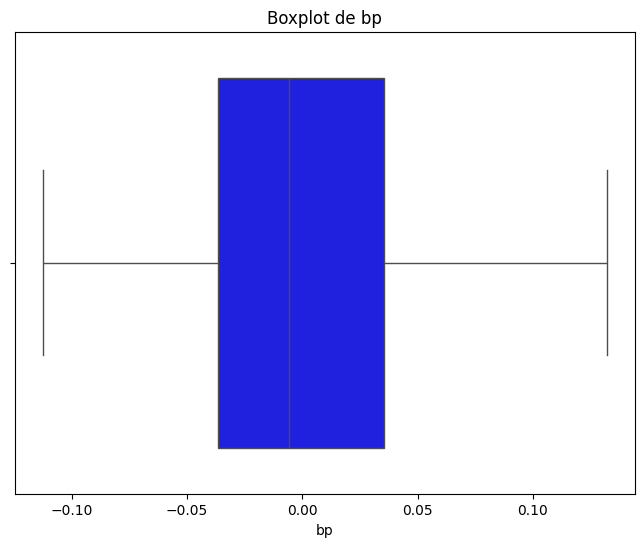

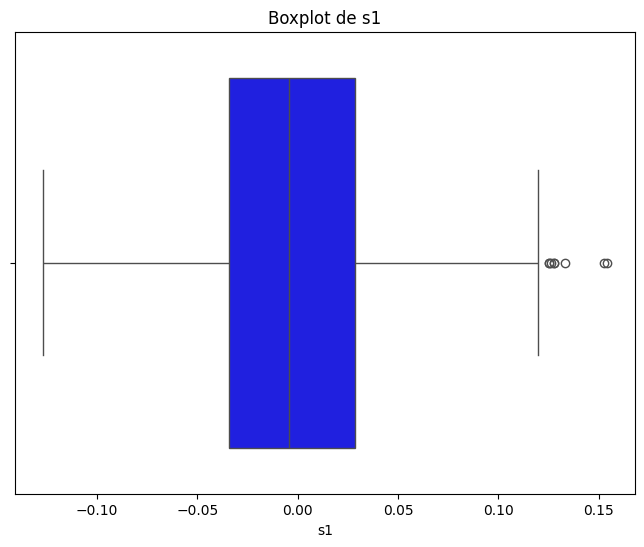

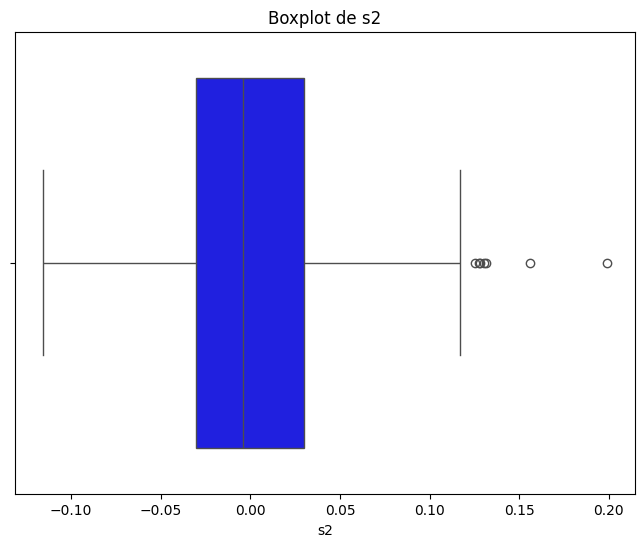

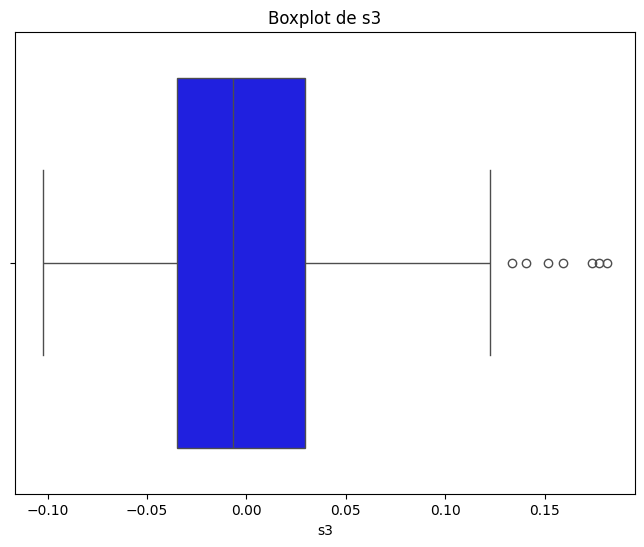

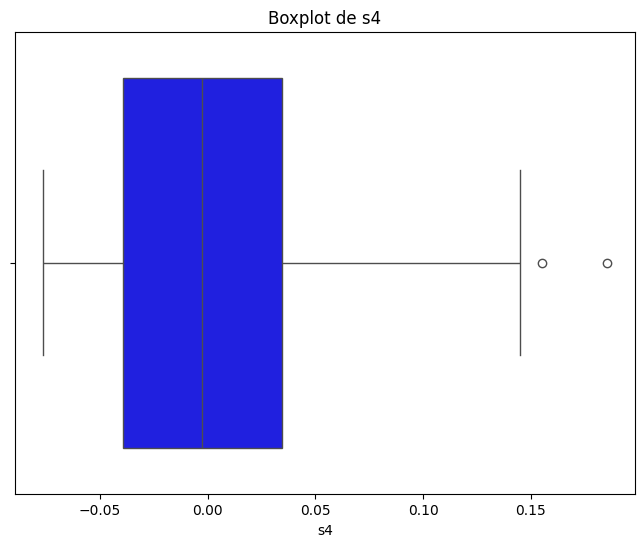

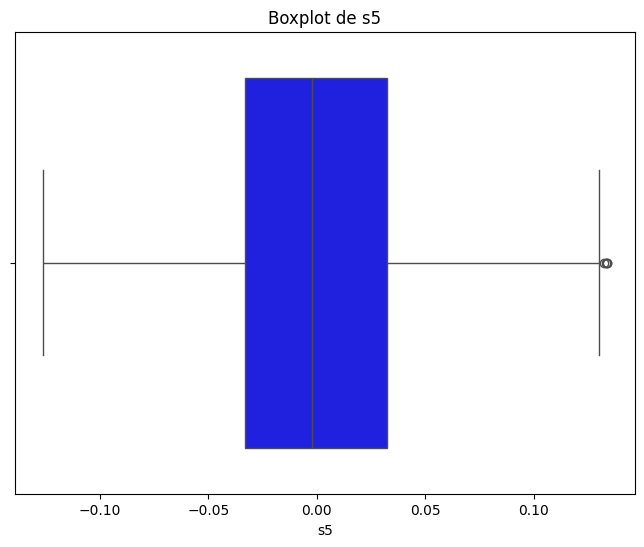

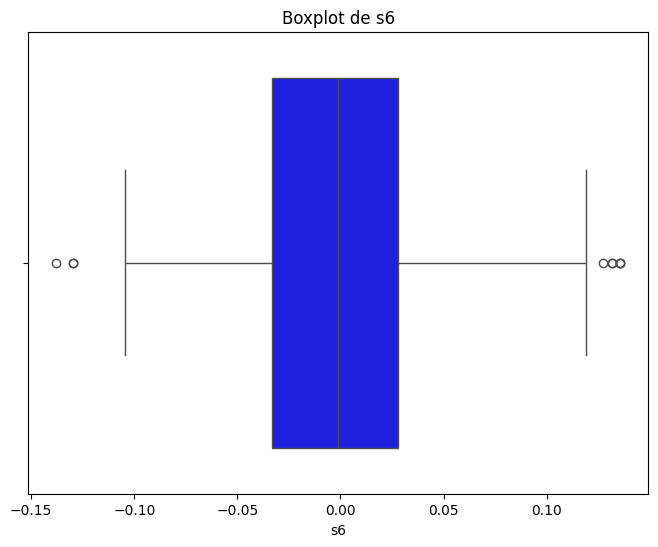

In [25]:
for coluna in Dados.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Dados[coluna], color='blue')
    plt.xlabel(coluna)
    plt.title(f'Boxplot de {coluna}')
    plt.show()

In [26]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer

# Normalização Robustscaler

[[ 0.43373494  1.          1.05349794 ...  0.          0.33275503
  -0.27118644]
 [-0.09638554  0.         -0.67489712 ... -0.5        -1.01075642
  -1.49152542]
 [ 1.06024096  1.          0.79012346 ...  0.          0.07321305
  -0.40677966]
 ...
 [ 0.48192771  1.         -0.13168724 ... -0.115      -0.68417765
   0.27118644]
 [-0.6746988   0.          0.70781893 ...  0.395       0.70763359
  -0.40677966]
 [-0.6746988   0.         -1.00411523 ... -0.5        -0.03462873
   0.06779661]]


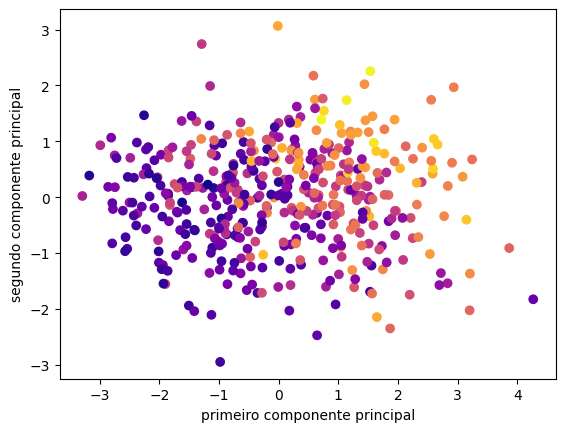

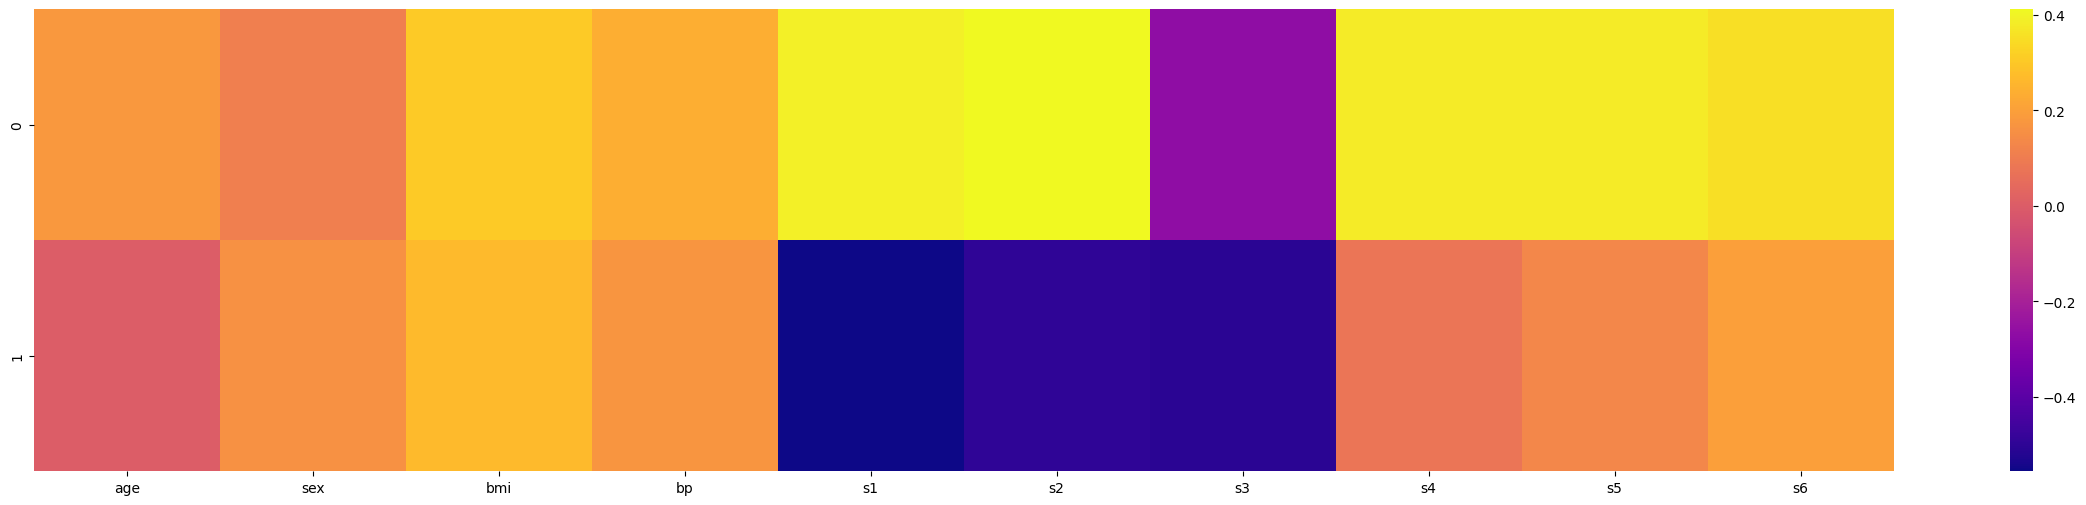

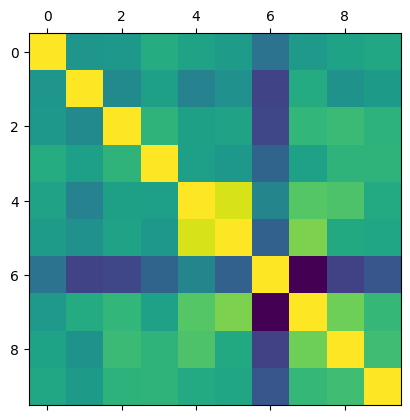

In [29]:
Dados = pd.DataFrame(diabetes['data'],columns = diabetes["feature_names"])

scalar = RobustScaler()
scalar.fit(Dados)

normalizado = scalar.transform(Dados)
print(normalizado)

pca = PCA(n_components = 2)
pca.fit(normalizado)

x_dados = pca.transform(normalizado)
x_dados.shape

plt.scatter(x_dados[:,0], x_dados[:,1], c= diabetes["target"], cmap= "plasma")
plt.xlabel("primeiro componente principal")
plt.ylabel("segundo componente principal")


pca.components_

dados_comp = pd.DataFrame(pca.components_,columns=diabetes["feature_names"])

plt.figure(figsize = (30,6))
sns.heatmap(dados_comp, cmap="plasma")

plt.matshow(Dados.corr())

# Normalização MinMaxScaler

Redimensiona os dados para um intervalo, geralmente [0, 1].


[[0.66666667 1.         0.58264463 ... 0.28208745 0.562217   0.43939394]
 [0.48333333 0.         0.14876033 ... 0.14104372 0.22243673 0.16666667]
 [0.88333333 1.         0.51652893 ... 0.28208745 0.49657763 0.40909091]
 ...
 [0.68333333 1.         0.28512397 ... 0.24964739 0.30503001 0.56060606]
 [0.28333333 0.         0.49586777 ... 0.39351199 0.65702552 0.40909091]
 [0.28333333 0.         0.0661157  ... 0.14104372 0.46930394 0.51515152]]


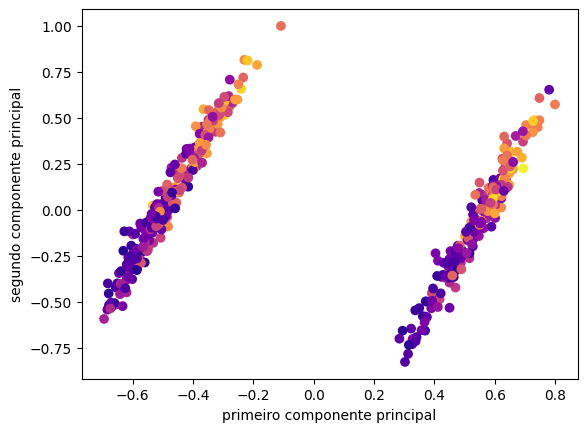

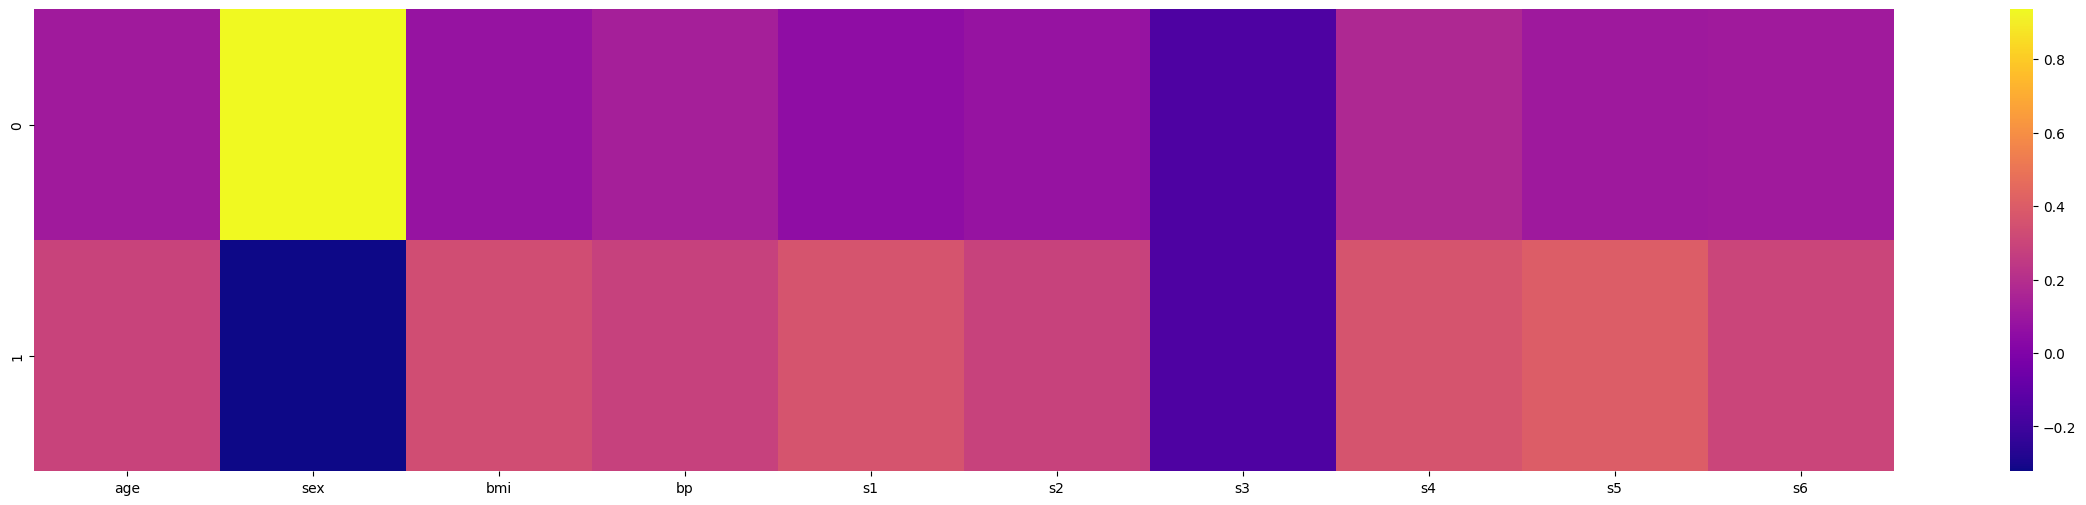

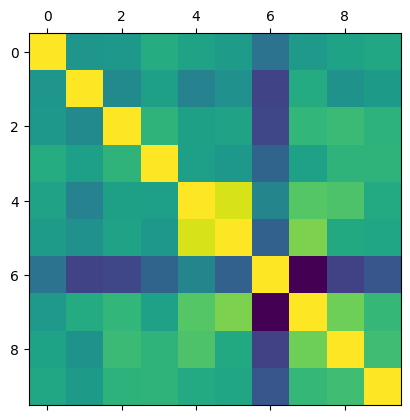

In [30]:
Dados = pd.DataFrame(diabetes['data'],columns = diabetes["feature_names"])

scalar = MinMaxScaler()
scalar.fit(Dados)

normalizado = scalar.transform(Dados)
print(normalizado)

pca = PCA(n_components = 2)
pca.fit(normalizado)

x_dados = pca.transform(normalizado)
x_dados.shape

plt.scatter(x_dados[:,0], x_dados[:,1], c= diabetes["target"], cmap= "plasma")
plt.xlabel("primeiro componente principal")
plt.ylabel("segundo componente principal")


pca.components_

dados_comp = pd.DataFrame(pca.components_,columns=diabetes["feature_names"])

plt.figure(figsize = (30,6))
sns.heatmap(dados_comp, cmap="plasma")

plt.matshow(Dados.corr())

# Normalização Normalizer

Normaliza cada linha para ter norma unitária.


[[ 0.32100638  0.42726865  0.52014193 ... -0.02185457  0.16783396
  -0.14876911]
 [-0.01166161 -0.27661457 -0.31895057 ... -0.24471426 -0.42340521
  -0.57132725]
 [ 0.65740682  0.39059652  0.34258975 ... -0.01997881  0.02205238
  -0.1998476 ]
 ...
 [ 0.42498708  0.51640371 -0.16207644 ... -0.11289447 -0.47770833
   0.15784238]
 [-0.4486938  -0.44049558  0.38544075 ...  0.26207365  0.43938148
  -0.25586427]
 [-0.19283454 -0.18931121 -0.30969865 ... -0.16747907 -0.01790212
   0.0129952 ]]


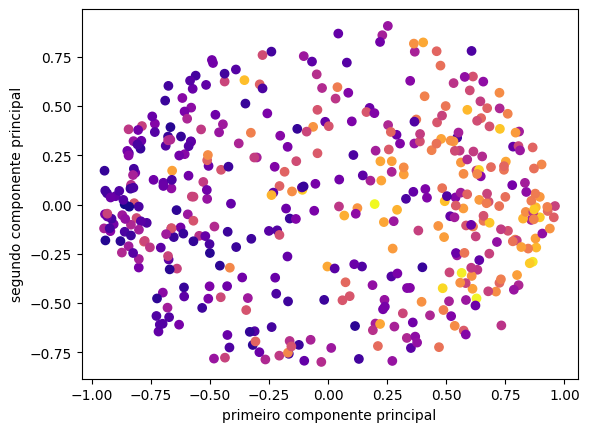

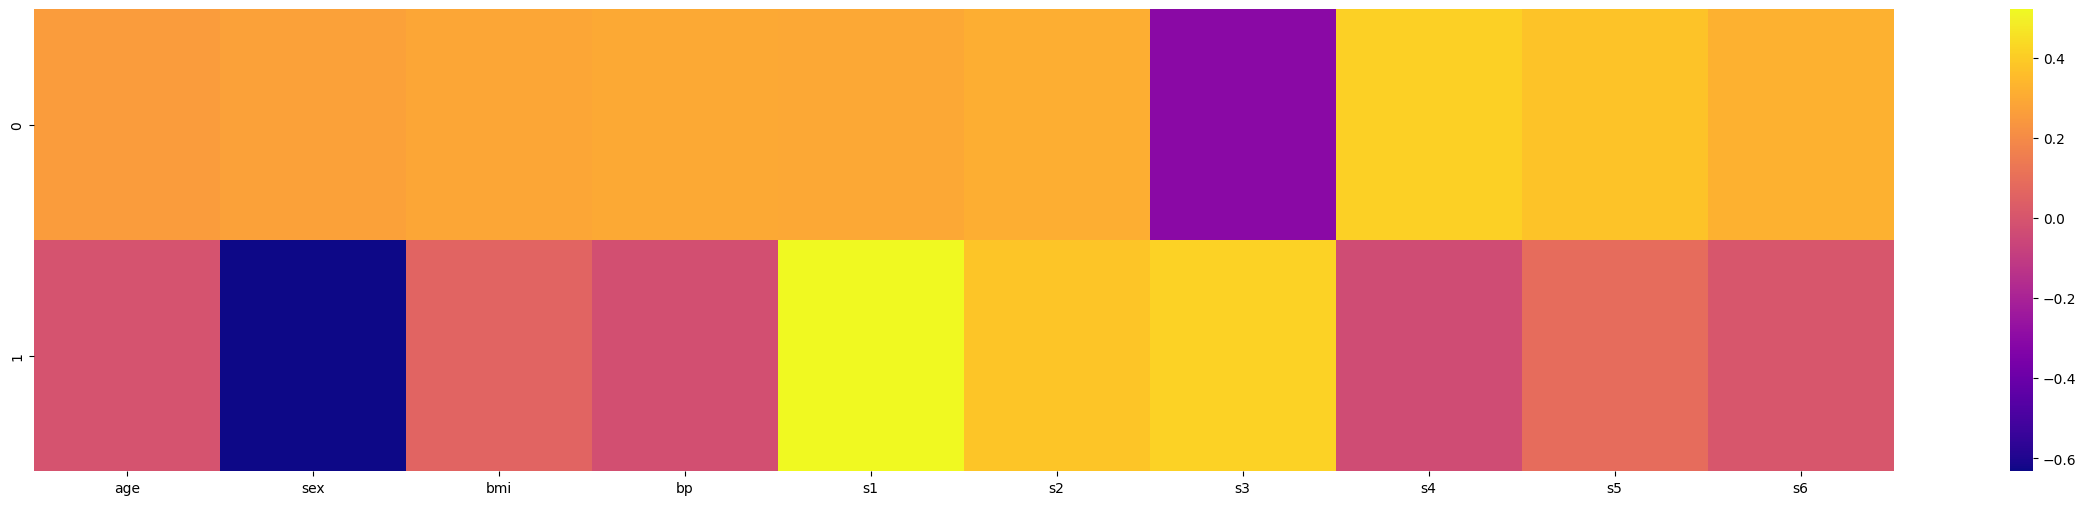

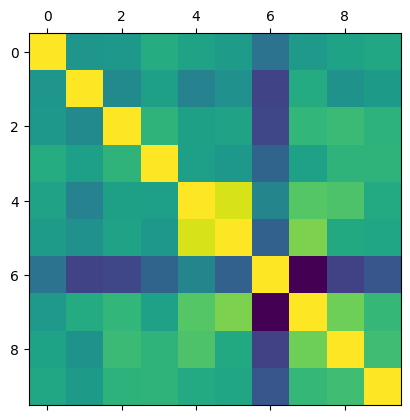

In [31]:
Dados = pd.DataFrame(diabetes['data'],columns = diabetes["feature_names"])

scalar = Normalizer()
scalar.fit(Dados)

normalizado = scalar.transform(Dados)
print(normalizado)

pca = PCA(n_components = 2)
pca.fit(normalizado)

x_dados = pca.transform(normalizado)
x_dados.shape

plt.scatter(x_dados[:,0], x_dados[:,1], c= diabetes["target"], cmap= "plasma")
plt.xlabel("primeiro componente principal")
plt.ylabel("segundo componente principal")


pca.components_

dados_comp = pd.DataFrame(pca.components_,columns=diabetes["feature_names"])

plt.figure(figsize = (30,6))
sns.heatmap(dados_comp, cmap="plasma")

plt.matshow(Dados.corr())